## Import Packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
%matplotlib inline

## Data Loading

In [45]:
# Load and display top few rows
airbnb_data_cleaned = pd.read_csv('airbnb_data_cleaned.csv', index_col=0).reset_index(drop=True)
airbnb_data_cleaned.head(5)

listing_url  \
0  https://www.airbnb.com/rooms/264776   
1  https://www.airbnb.com/rooms/264777   
2  https://www.airbnb.com/rooms/264778   
3  https://www.airbnb.com/rooms/264779   
4  https://www.airbnb.com/rooms/264780   

                                              name  host_id  host_since  \
0                      Huge Four Bedroom Apartment  1389063  2011-11-09   
1                            One Bedroom Apartment  1389063  2011-11-09   
2          Two Bedroom Newly Refurbished Apartment  1389063  2011-11-09   
3                Refurbished Two Bedroom Apartment  1389063  2011-11-09   
4  Spacious refurbished 2 bedroom apt with balcony  1389063  2011-11-09   

   host_tenure_days host_since_readable host_response_time  \
0              5056   November 09, 2011     within an hour   
1              5056   November 09, 2011     within an hour   
2              5056   November 09, 2011     within an hour   
3              5056   November 09, 2011     within an hour   
4              5056   November 09, 2011     within an hour   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0                0.86                   1.0                  0   
1                0.86                   1.0                  0   
2                0.86                   1.0                  0   
3                0.86                   1.0                  0   
4                0.86                   1.0                  0   

   host_total_listings_count  host_verifications  verifications_count  \
0                         12  ['email', 'phone']                    2   
1                         12  ['email', 'phone']                    2   
2                         12  ['email', 'phone']                    2   
3                         12  ['email', 'phone']                    2   
4                         12  ['email', 'phone']                    2   

   host_has_profile_pic  host_identity_verified neighbourhood_cleansed  \
0                     1                       1               Lewisham   
1                     1                       1               Lewisham   
2                     1                       1               Lewisham   
3                     1                       1               Lewisham   
4                     1                       1               Lewisham   

   latitude  longitude       property_type        room_type  accommodates  \
0  51.44306   -0.01948  Entire rental unit  Entire home/apt            10   
1  51.44284   -0.01997  Entire rental unit  Entire home/apt             2   
2  51.44359   -0.02275  Entire rental unit  Entire home/apt             4   
3  51.44355   -0.02309  Entire rental unit  Entire home/apt             5   
4  51.44333   -0.02307  Entire rental unit  Entire home/apt             4   

  bathrooms_text  bathrooms_number  bedrooms  beds  \
0        2 baths               2.0         4     8   
1         1 bath               1.0         1     2   
2         1 bath               1.0         2     3   
3         1 bath               1.0         2     5   
4        2 baths               2.0         2     4   

                                           amenities  amenities_count  price  \
0  ["Cooking basics", "Washer", "Iron", "Smoke al...               35  297.0   
1  ["Cooking basics", "Wine glasses", "Iron", "Sm...               44   98.0   
2  ["Cooking basics", "Iron", "Smoke alarm", "Fir...               27  148.0   
3  ["Cooking basics", "Iron", "Smoke alarm", "Fir...               29  144.0   
4  ["Cooking basics", "Washer", "Iron", "Smoke al...               35  157.0   

   minimum_nights  maximum_nights  availability_30  availability_60  \
0               3             365               13               15   
1               3             365                0               13   
2               3             365                3                6   
3               3             365               11               33   
4               3             365            

## Dataset Overview

In [46]:
# Verify the shape and datatypes of the data
print("Data Shape:", airbnb_data_cleaned.shape)
print("Data Info:")
airbnb_data_cleaned.info()

Data Shape: (57941, 54)
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57941 entries, 0 to 57940
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   57941 non-null  object 
 1   name                                          57941 non-null  object 
 2   host_id                                       57941 non-null  int64  
 3   host_since                                    57941 non-null  object 
 4   host_tenure_days                              57941 non-null  int64  
 5   host_since_readable                           57941 non-null  object 
 6   host_response_time                            57941 non-null  object 
 7   host_response_rate                            57941 non-null  float64
 8   host_acceptance_rate                          57941 non-null  float64
 9   host_is_superhost         

# Type Coversions

In [47]:
# Convert 'host_since' column to datetime
airbnb_data_cleaned['host_since'] = pd.to_datetime(airbnb_data_cleaned['host_since'], format='%Y-%m-%d')
print("'host_since' Data Type:", airbnb_data_cleaned['host_since'].dtype)

# Convert bathroom_number column to integer
airbnb_data_cleaned['bathrooms_number'] = airbnb_data_cleaned['bathrooms_number'].astype(int)
print("'bathrooms_number' Data Type:", airbnb_data_cleaned['bathrooms_number'].dtype)



'host_since' Data Type: datetime64[ns]
'bathrooms_number' Data Type: int64


## Check for Missing Values Before EDA

In [48]:
# Check for missing values
missing_values = airbnb_data_cleaned.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
listing_url                                     0
name                                            0
host_id                                         0
host_since                                      0
host_tenure_days                                0
host_since_readable                             0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_total_listings_count                       0
host_verifications                              0
verifications_count                             0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type              

# Descriptive Statistics

In [49]:
# Calculate Descriptive Statistics
airbnb_data_cleaned.describe()

host_id                     host_since  host_tenure_days  \
count  5.794100e+04                          57941      57941.000000   
mean   2.623012e+08  2018-12-07 22:26:28.719559680       2470.064945   
min    2.594000e+03            2008-08-28 00:00:00         96.000000   
25%    4.265321e+07            2015-09-03 00:00:00       1091.000000   
50%    2.017206e+08            2018-07-12 00:00:00       2619.000000   
75%    4.799357e+08            2022-09-17 00:00:00       3662.000000   
max    7.001298e+08            2025-06-08 00:00:00       6224.000000   
std    2.254034e+08                            NaN       1427.743757   

       host_response_rate  host_acceptance_rate  host_is_superhost  \
count        57941.000000          57941.000000       57941.000000   
mean             0.813429              0.756576           0.236810   
min              0.000000              0.000000           0.000000   
25%              0.890000              0.610000           0.000000   
50%              1.000000              0.960000           0.000000   
75%              1.000000              1.000000           0.000000   
max              1.000000              1.000000           1.000000   
std              0.355602              0.346149           0.425128   

       host_total_listings_count  verifications_count  host_has_profile_pic  \
count               57941.000000         57941.000000          57941.000000   
mean                  108.066602             2.000897              0.942804   
min                     1.000000             0.000000              0.000000   
25%                     2.000000             2.000000              1.000000   
50%                     5.000000             2.000000              1.000000   
75%                    24.000000             2.000000              1.000000   
max                  8723.000000             3.000000              1.000000   
std                   702.484173             0.465777              0.232219   

       host_identity_verified      latitude     longitude  accommodates  \
count            57941.000000  57941.000000  57941.000000  57941.000000   
mean                 0.921403     51.509510     -0.128963      3.533819   
min                  0.000000     51.295937     -0.496075      1.000000   
25%                  1.000000     51.485901     -0.191180      2.000000   
50%                  1.000000     51.513200     -0.132850      3.000000   
75%                  1.000000     51.536924     -0.069420      4.000000   
max                  1.000000     51.682630      0.278960     16.000000   
std                  0.269111      0.049386      0.105637      2.202373   

       bathrooms_number      bedrooms          beds  amenities_count  \
count      57941.000000  57941.000000  57941.000000     57941.000000   
mean           1.290502      1.557049      1.952037        31.420859   
min            0.000000      0.000000      0.000000         0.000000   
25%            1.000000      1.000000      1.000000        19.000000   
50%            1.000000      1.000000      2.000000        32.000000   
75%            1.000000      2.000000      2.000000        42.000000   
max           30.000000     50.000000     50.000000       104.000000   
std            0.711732      1.042344      1.432064        15.325654   

              price  minimum_nights  maximum_nights  availability_30  \
count  57941.000000    57941.000000    57941.000000     57941.000000   
mean     216.141178        4.868608      410.956732        11.860789   
min        6.000000        1.000000        1.000000         0.000000   
25%       77.000000        1.000000       90.000000         3.000000   
50%      135.000000        2.000000      365.000000         9.000000   
75%      227.000000        3.000000      365.000000        21.000000   
max    74100.000000      999.000000     9011.000000        30.000000   
std      889.197592       17.525212      359.179477        10.503718   

       availability_60  availability_90  avail

# Handling Revenue Column
Calculating number of zeroes and applying a filter - has_revenue

In [50]:
# Find number of zeroes in revenue column
zero_count = airbnb_data_cleaned[airbnb_data_cleaned['estimated_revenue_l365d'] == 0].count() / airbnb_data_cleaned.shape[0] * 100
print("Number of zeroes in revenue column:", zero_count)

# Create a new binary column 'has_revenue' and preview it
airbnb_data_cleaned['has_revenue'] = np.where(airbnb_data_cleaned['estimated_occupancy_l365d'] > 0, 1, 0)
airbnb_data_cleaned['has_revenue'].value_counts(normalize=True) * 100

Number of zeroes in revenue column: listing_url                                     34.136449
name                                            34.136449
host_id                                         34.136449
host_since                                      34.136449
host_tenure_days                                34.136449
host_since_readable                             34.136449
host_response_time                              34.136449
host_response_rate                              34.136449
host_acceptance_rate                            34.136449
host_is_superhost                               34.136449
host_total_listings_count                       34.136449
host_verifications                              34.136449
verifications_count                             34.136449
host_has_profile_pic                            34.136449
host_identity_verified                          34.136449
neighbourhood_cleansed                          34.136449
latitude                            

has_revenue
1    65.751368
0    34.248632
Name: proportion, dtype: float64

## Univariate Analysis

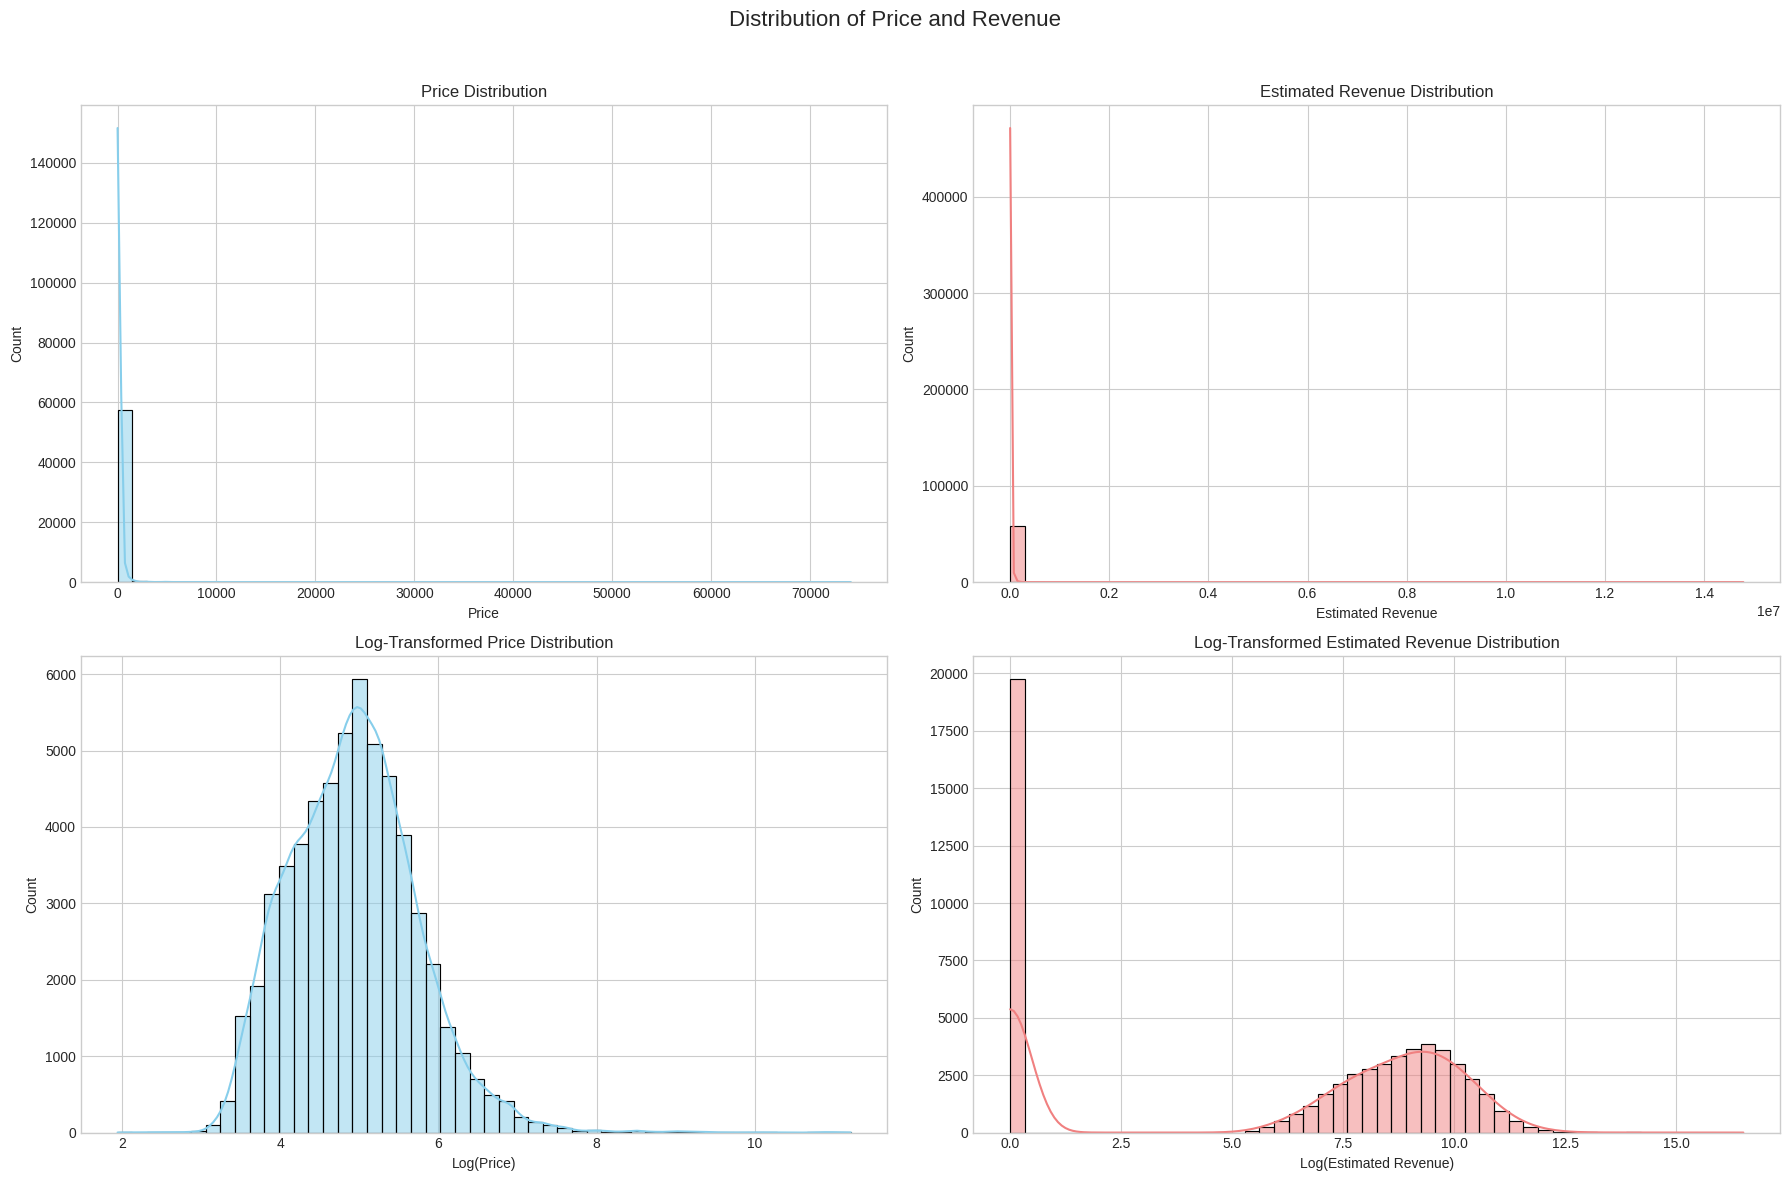

In [68]:

# --- Improved Visualization Code ---
# We will use a 2x2 grid to show both the original and log-transformed distributions
# for a direct comparison.

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Price and Revenue', fontsize=16)


# ----- Row 1: Original Plots  -----

# Log-Transformed Price Distribution
sns.histplot(airbnb_data_cleaned['price'], bins=50, kde=True, ax=axes[0,0], color='skyblue')
axes[0, 0].set_title('Price Distribution')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Count')

# Log-Transformed Estimated Revenue Distribution
sns.histplot(airbnb_data_cleaned['estimated_revenue_l365d'], bins=50, kde=True, ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Estimated Revenue Distribution')
axes[0,1].set_xlabel('Estimated Revenue')
axes[0,1].set_ylabel('Count')


# ----- Row 2: Log-Transformed Plots for Better Representation -----


# Log-Transformed Price Distribution
sns.histplot(np.log1p(airbnb_data_cleaned['price']), bins=50, kde=True, ax=axes[1,0], color='skyblue')
axes[1, 0].set_title('Log-Transformed Price Distribution')
axes[1, 0].set_xlabel('Log(Price)')
axes[1, 0].set_ylabel('Count')

# Log-Transformed Estimated Revenue Distribution
sns.histplot(np.log1p(airbnb_data_cleaned['estimated_revenue_l365d']), bins=50, kde=True, ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Log-Transformed Estimated Revenue Distribution')
axes[1, 1].set_xlabel('Log(Estimated Revenue)')
axes[1, 1].set_ylabel('Count')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()





**Understanding Listing Prices and Revenue Distributions:**

Looking at the charts that show the spread of listing prices and estimated annual revenue, we observe a clear pattern:

*   **A large number of listings are concentrated at the lower end of both price and estimated revenue.** This means many properties are listed at more accessible price points, and the majority of listings generate a more modest level of income over a year.
*   **However, there's a significant tail of listings with much higher prices and estimated revenues.** These are the properties that command premium rates and generate substantial income. While they are fewer in number, these "outliers" have a notable impact on the overall picture and average values.
*   **To get a clearer view of where most listings sit, we use a different scale (Log Transformation).** The "Log-Transformed" charts help to compress the wide range of values caused by the outliers, allowing us to see the typical distribution of prices and revenues for the majority of listings more effectively.

In summary, the data highlights a diverse market with a large base of standard-performing listings and a smaller segment of high-value, high-earning properties. Understanding this distribution is key to analyzing the factors that contribute to success on the platform.

## Check for Outliers

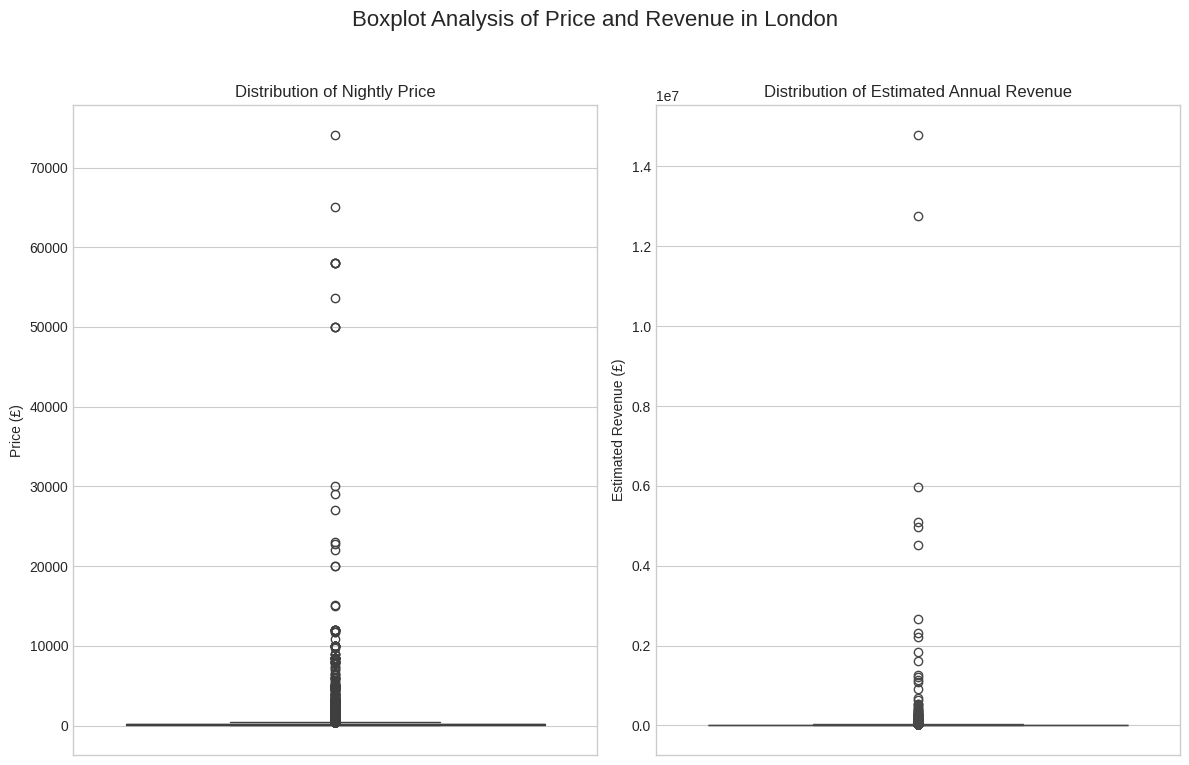

In [52]:
# Create a figure with 1 row and 2 columns of subplots
# Note: plt.subplots() with an 's'
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# --- Plot 1: Boxplot for Price ---
# Use axes[0] for the first subplot
sns.boxplot(data=airbnb_data_cleaned, y='price', ax=axes[0])
axes[0].set_title('Distribution of Nightly Price')
axes[0].set_ylabel('Price (£)')


# --- Plot 2: Boxplot for Estimated Revenue ---
# Use axes[1] for the second subplot
sns.boxplot(data=airbnb_data_cleaned, y='estimated_revenue_l365d', ax=axes[1], color='mediumseagreen')
axes[1].set_title('Distribution of Estimated Annual Revenue')
axes[1].set_ylabel('Estimated Revenue (£)')


# Add a main title to the entire figure
fig.suptitle('Boxplot Analysis of Price and Revenue in London', fontsize=16)

# Adjust layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # rect adjusts for the suptitle

# Display the plot
plt.show()

In [53]:
# Investigate Outliers

price__Q1 = airbnb_data_cleaned['price'].quantile(0.25)
price__Q3 = airbnb_data_cleaned['price'].quantile(0.75)

price_IQR = price__Q3 - price__Q1

# Define outlier boundaries
price_lower_bound = price__Q1 - 1.5 * price_IQR
price_upper_bound = price__Q3 + 1.5 * price_IQR

price_outliers_lower = airbnb_data_cleaned[airbnb_data_cleaned['price'] < price_lower_bound].reset_index().sort_values('price', ascending=False)
price_outliers_upper = airbnb_data_cleaned[airbnb_data_cleaned['price'] > price_upper_bound].reset_index().sort_values('price', ascending=False)

# 1. Print the calculated lower bound. It will likely be negative.
print(f"The calculated lower bound for price is: {price_lower_bound}")

# 2. Print the actual minimum price in your dataset.
print(f"The actual minimum price in the dataset is: {airbnb_data_cleaned['price'].min()}")

The calculated lower bound for price is: -148.0
The actual minimum price in the dataset is: 6.0


## Setting Upper and Lower Limits
## Reasons for selection
- Targeting current and future hosts in a reasonable price range in London Area.
- Removing listings with placeholder price ranges and/or listings with specific purpose (e.g, refugee guests ) which can be too low or too high.


In [54]:
print("Number of rows before setting lower and upper limit:", len(airbnb_data_cleaned))

lower_limit = 30
upper_limit = 30000


# Use the .between() method for a cleaner filter
airbnb_data_cleaned = airbnb_data_cleaned[
    airbnb_data_cleaned['price'].between(lower_limit, upper_limit)
]

print("Number of rows after applying the limits:", len(airbnb_data_cleaned))

Number of rows before setting lower and upper limit: 57941
Number of rows after applying the limits: 57388


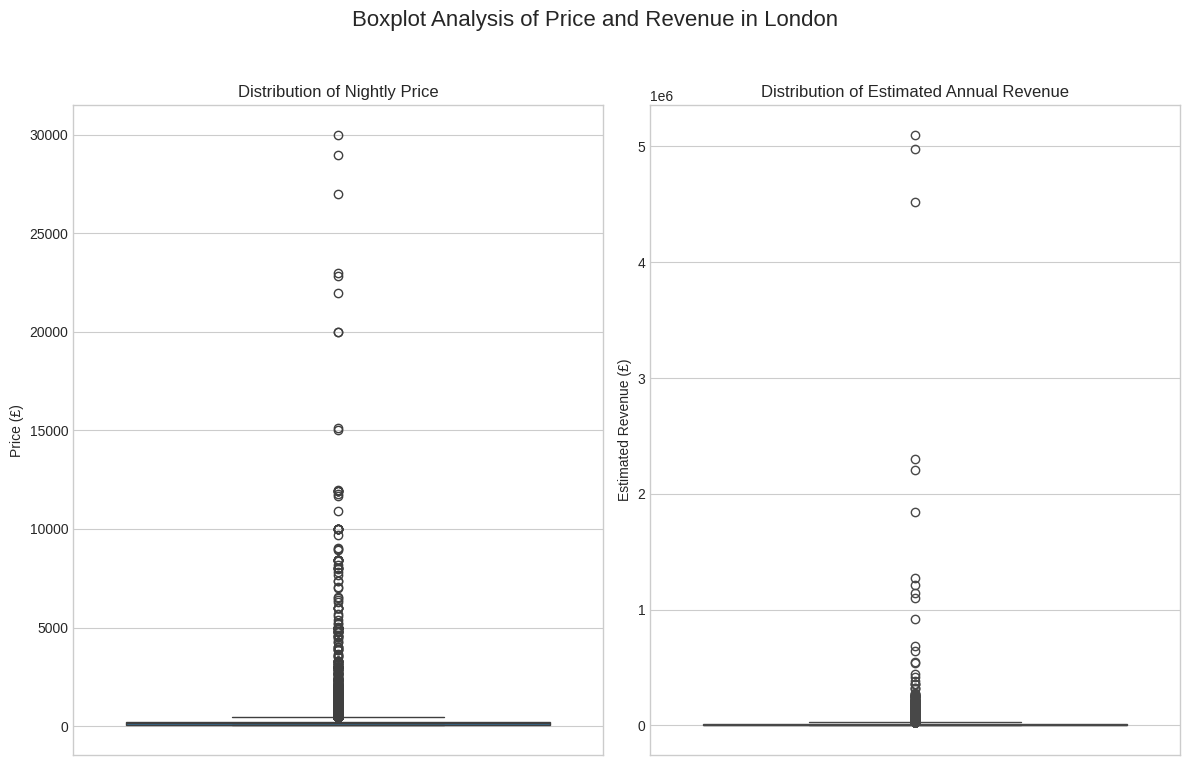

In [55]:
# Create a figure with 1 row and 2 columns of subplots
# Note: plt.subplots() with an 's'
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# --- Plot 1: Boxplot for Price ---
# Use axes[0] for the first subplot
sns.boxplot(data=airbnb_data_cleaned, y='price', ax=axes[0])
axes[0].set_title('Distribution of Nightly Price')
axes[0].set_ylabel('Price (£)')


# --- Plot 2: Boxplot for Estimated Revenue ---
# Use axes[1] for the second subplot
sns.boxplot(data=airbnb_data_cleaned, y='estimated_revenue_l365d', ax=axes[1], color='mediumseagreen')
axes[1].set_title('Distribution of Estimated Annual Revenue')
axes[1].set_ylabel('Estimated Revenue (£)')


# Add a main title to the entire figure
fig.suptitle('Boxplot Analysis of Price and Revenue in London', fontsize=16)

# Adjust layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # rect adjusts for the suptitle

# Display the plot
plt.show()

## Create new columns for log-transformed price and revenue

In [56]:

# # Create a new column log_price and insert it next to the price column
price_index = airbnb_data_cleaned.columns.get_loc('price') # Get the location of price column
log_price = np.log1p(airbnb_data_cleaned['price']) # Calculat e the log prices
airbnb_data_cleaned.insert(price_index + 1, 'log_price', log_price) # Insert log prices next to price column

# Create a new column log_estimated_revenue_l365d and insert it next to the estimated_revenue_l365d column
estimated_revenue_l365d_index = airbnb_data_cleaned.columns.get_loc('estimated_revenue_l365d') # Get the location of revenue column
log_estimated_revenue_l365d = np.log1p(airbnb_data_cleaned['estimated_revenue_l365d']) # Calculate the log revenues
airbnb_data_cleaned.insert(estimated_revenue_l365d_index + 1, 'log_estimated_revenue_l365d', log_estimated_revenue_l365d) # Insert log revenues next to revenue column
airbnb_data_cleaned.head(1)


listing_url                         name  host_id  \
0  https://www.airbnb.com/rooms/264776  Huge Four Bedroom Apartment  1389063   

  host_since  host_tenure_days host_since_readable host_response_time  \
0 2011-11-09              5056   November 09, 2011     within an hour   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0                0.86                   1.0                  0   

   host_total_listings_count  host_verifications  verifications_count  \
0                         12  ['email', 'phone']                    2   

   host_has_profile_pic  host_identity_verified neighbourhood_cleansed  \
0                     1                       1               Lewisham   

   latitude  longitude       property_type        room_type  accommodates  \
0  51.44306   -0.01948  Entire rental unit  Entire home/apt            10   

  bathrooms_text  bathrooms_number  bedrooms  beds  \
0        2 baths                 2         4     8   

                                           amenities  amenities_count  price  \
0  ["Cooking basics", "Washer", "Iron", "Smoke al...               35  297.0   

   log_price  minimum_nights  maximum_nights  availability_30  \
0   5.697093               3             365               13   

   availability_60  availability_90  availability_365  number_of_reviews  \
0               15               31               293                 68   

   number_of_reviews_ltm  number_of_reviews_l30d  availability_eoy  \
0                     12                       1               134   

   estimated_occupancy_l365d  estimated_revenue_l365d  \
0                        110                  32670.0   

   log_estimated_revenue_l365d  review_scores_rating  review_scores_accuracy  \
0                    10.394243                  4.68                    4.65   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.72                   4.84   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.74                    4.62                 4.72   

   instant_bookable  calculated_host_listings_count  \
0                 1                              11   

   calculated_host_listings_count_entire_homes  \
0                                           11   

   calculated_host_listings_count_private_rooms  \
0                                             0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                            0               0.51   

   has_reviews  has_revenue  
0            1            1

# Count of Key Features

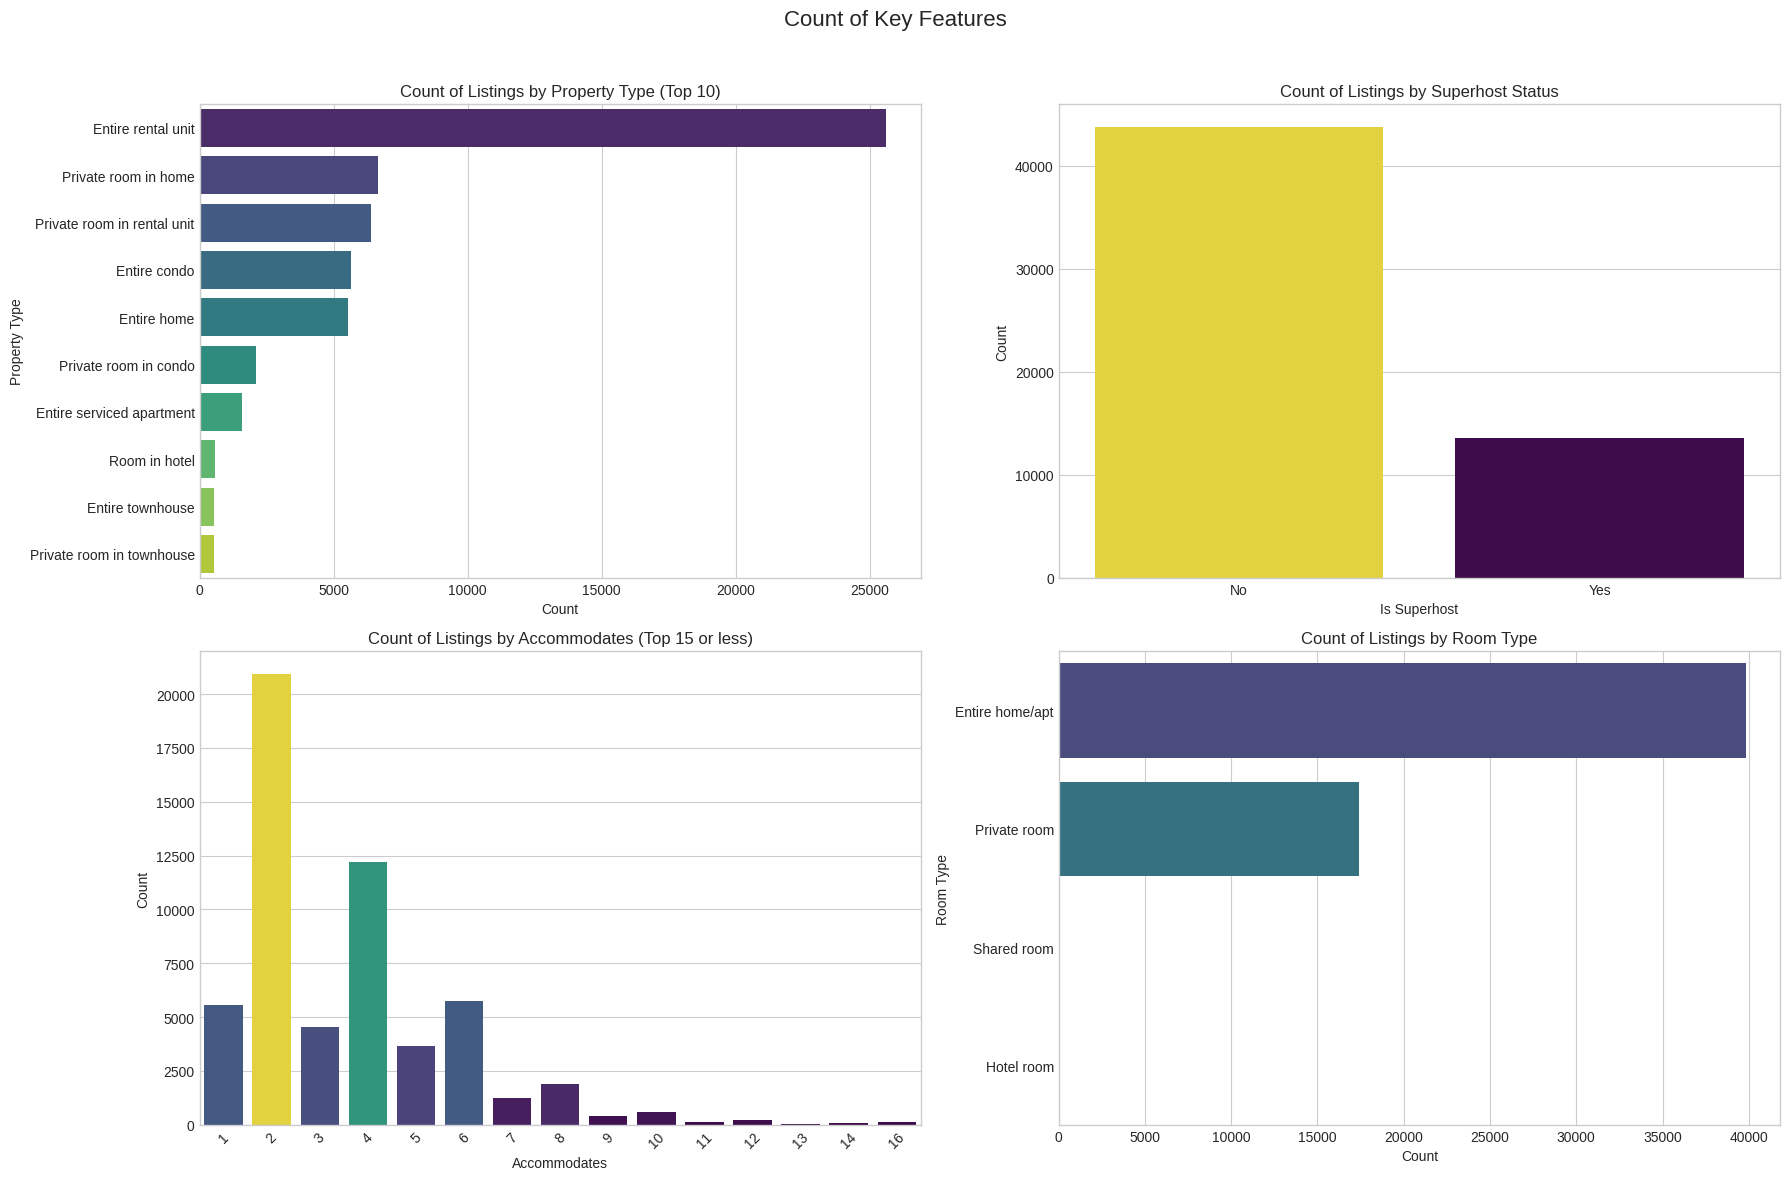

In [57]:
# Set a style for the plots
plt.style.use('seaborn-v0_8-whitegrid')

# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Count of Key Features', fontsize=16)

# Plot 1: Property Type (Top 10)
property_type_counts = airbnb_data_cleaned['property_type'].value_counts().nlargest(10)
sns.barplot(x=property_type_counts.values, y=property_type_counts.index, ax=axes[0, 0], palette='viridis',
            hue=property_type_counts.index, legend=False)
axes[0, 0].set_title('Count of Listings by Property Type (Top 10)')
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('Property Type')

# Plot 2: Host is Superhost (Binary/Categorical)
superhost_counts = airbnb_data_cleaned['host_is_superhost'].value_counts()
sns.barplot(x=superhost_counts.index, y=superhost_counts.values, ax=axes[0, 1], palette='viridis',
            hue=superhost_counts.values, legend=False)
axes[0, 1].set_title('Count of Listings by Superhost Status')
axes[0, 1].set_xlabel('Is Superhost')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['No', 'Yes'])

# Plot 3: Accommodates Count (Numerical)
accommodates_counts = airbnb_data_cleaned['accommodates'].value_counts().sort_index()
# Limit to a reasonable number of accommodates for clarity if there are many unique values
if len(accommodates_counts) > 15:
    accommodates_counts = accommodates_counts.nlargest(15)
sns.barplot(x=accommodates_counts.index, y=accommodates_counts.values, ax=axes[1, 0], palette='viridis',
            hue=accommodates_counts.values, legend=False)
axes[1, 0].set_title('Count of Listings by Accommodates (Top 15 or less)')
axes[1, 0].set_xlabel('Accommodates')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45) # Rotate labels if they overlap

# Plot 4: Room Type (Categorical)
room_type_counts = airbnb_data_cleaned['room_type'].value_counts()
sns.barplot(x=room_type_counts.values, y=room_type_counts.index, ax=axes[1, 1], palette='viridis',
            hue=room_type_counts.index, legend=False)
axes[1, 1].set_title('Count of Listings by Room Type')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Room Type')


plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent title overlap
plt.show()

**Analysis of Listing Characteristics:**

Based on the visualizations of key listing attributes:

*   **Property Types:** The dataset reveals that "Entire rental units" are the most common type of property available, followed by various forms of "Private rooms" and "Entire homes" or "condos". This indicates a strong market presence for both complete dwelling rentals and private room options.
*   **Superhost Status:** The data shows that a significant majority of hosts are not designated as "Superhosts". This highlights an opportunity to potentially analyze the characteristics or performance differences between Superhosts and regular hosts.
*   **Accommodates:** The data suggests that hosts are more favourable to small group of people under 5 which make up a huge majority of the listings.
*   **Room Types:** "Entire home/apt" is the dominant room type, considerably more frequent than "Private room", "Shared room", or "Hotel room". This signifies that guests are most commonly booking entire spaces rather than just rooms within a property.

## Bivariate Analysis

**Which are unqiue property types, room types and neighbourhoods with the highest average prices and earn the highest revenue?**

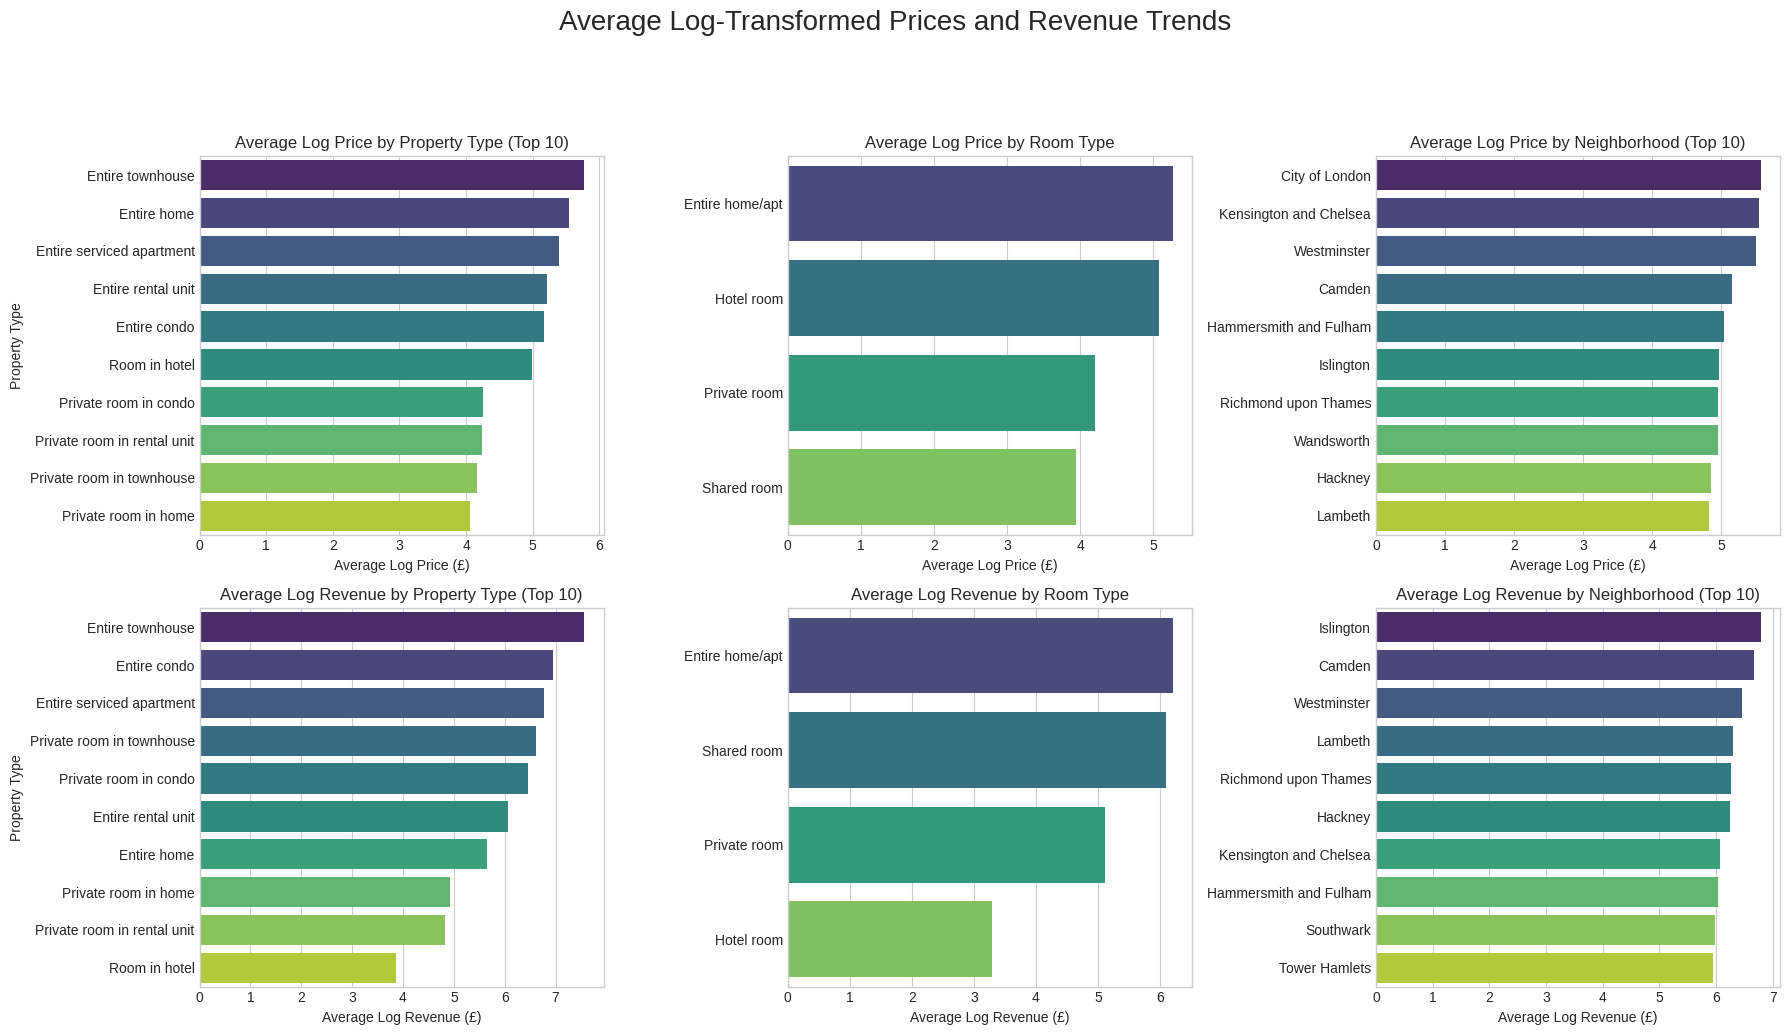

In [60]:

# --- Data Preparation for Plots ---
# Get the top 10 most frequent property types
top_10_property_types = airbnb_data_cleaned['property_type'].value_counts().nlargest(10).index

# Filter the dataframe to include only these top 10 property types
filtered_df = airbnb_data_cleaned[airbnb_data_cleaned['property_type'].isin(top_10_property_types)]

# --- Calculate Log-Transformed Averages ---

# By Property Type
avg_stats_by_property_type = filtered_df.groupby('property_type').agg(
    avg_log_price=('log_price','mean'),
    avg_log_revenue=('log_estimated_revenue_l365d', 'mean')
).reset_index()

# By Room Type
avg_stats_by_room_type = airbnb_data_cleaned.groupby('room_type').agg(
    avg_log_price=('log_price','mean'),
    avg_log_revenue=('log_estimated_revenue_l365d','mean')
).reset_index()

# By Neighborhood
avg_stats_by_neighborhood = airbnb_data_cleaned.groupby('neighbourhood_cleansed').agg(
    avg_log_price=('log_price','mean'),
    avg_log_revenue=('log_estimated_revenue_l365d', 'mean')
).reset_index()

# --- Create sorted DataFrames for plotting ---

# Property Type plots
prop_type_sorted_by_price = avg_stats_by_property_type.sort_values('avg_log_price', ascending=False)
prop_type_sorted_by_revenue = avg_stats_by_property_type.sort_values('avg_log_revenue', ascending=False)

# Room Type plots
room_type_sorted_by_price = avg_stats_by_room_type.sort_values('avg_log_price', ascending=False)
room_type_sorted_by_revenue = avg_stats_by_room_type.sort_values('avg_log_revenue', ascending=False)

# Neighborhood plots
neighborhood_sorted_by_price = avg_stats_by_neighborhood.nlargest(10, 'avg_log_price')
neighborhood_sorted_by_revenue = avg_stats_by_neighborhood.nlargest(10, 'avg_log_revenue')


# --- Create Subplots using Matplotlib/Seaborn ---
# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

# Create a 2x3 grid of subplots.
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Set the main title for the entire figure
fig.suptitle("Average Log-Transformed Prices and Revenue Trends", fontsize=20, y=1.03)


# --- Row 1: Average Log Price Plots ---
# Plot 1: Property Type
sns.barplot(ax=axes[0, 0], x='avg_log_price', y='property_type', data=prop_type_sorted_by_price, palette='viridis',
            hue='property_type', legend=False)
axes[0, 0].set_title('Average Log Price by Property Type (Top 10)')
axes[0, 0].set_xlabel('Average Log Price (£)')
axes[0, 0].set_ylabel('Property Type')

# Plot 2: Room Type
sns.barplot(ax=axes[0, 1], x='avg_log_price', y='room_type', data=room_type_sorted_by_price, palette='viridis',
            hue='room_type', legend=False
            )
axes[0, 1].set_title('Average Log Price by Room Type')
axes[0, 1].set_xlabel('Average Log Price (£)')
axes[0, 1].set_ylabel('')

# Plot 3: Neighborhood
sns.barplot(ax=axes[0, 2], x='avg_log_price', y='neighbourhood_cleansed', data=neighborhood_sorted_by_price, palette='viridis',
            hue='neighbourhood_cleansed', legend=False)
axes[0, 2].set_title('Average Log Price by Neighborhood (Top 10)')
axes[0, 2].set_xlabel('Average Log Price (£)')
axes[0, 2].set_ylabel('')


# --- Row 2: Average Log Revenue Plots ---
# Plot 4: Property Type
sns.barplot(ax=axes[1, 0], x='avg_log_revenue', y='property_type', data=prop_type_sorted_by_revenue, palette='viridis',
            hue='property_type', legend=False)
axes[1, 0].set_title('Average Log Revenue by Property Type (Top 10)')
axes[1, 0].set_xlabel('Average Log Revenue (£)')
axes[1, 0].set_ylabel('Property Type')

# Plot 5: Room Type
sns.barplot(ax=axes[1, 1], x='avg_log_revenue', y='room_type', data=room_type_sorted_by_revenue, palette='viridis',
            hue='room_type', legend=False)
axes[1, 1].set_title('Average Log Revenue by Room Type')
axes[1, 1].set_xlabel('Average Log Revenue (£)')
axes[1, 1].set_ylabel('')

# Plot 6: Neighborhood
sns.barplot(ax=axes[1, 2], x='avg_log_revenue', y='neighbourhood_cleansed', data=neighborhood_sorted_by_revenue, palette='viridis',
            hue='neighbourhood_cleansed', legend=False)
axes[1, 2].set_title('Average Log Revenue by Neighborhood (Top 10)')
axes[1, 2].set_xlabel('Average Log Revenue (£)')
axes[1, 2].set_ylabel('')


# --- Adjust layout and show the plot ---
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust rect to make room for suptitle
plt.show()


## **Key Findings from Property Price & Revenue Analysis**


1. **Property Type**: Entire Homes Generate the Most Money
- Price: Entire properties (townhouses, homes, serviced apartments) command the highest nightly prices. Private rooms in shared properties are consistently priced the lowest.

- Revenue: The trend continues for revenue. Entire properties are the top earners by a significant margin. This suggests they are not only expensive but also in high demand (i.e., they get booked often).

- Actionable Insight: The most straightforward path to maximizing both price and revenue is to offer an entire, self-contained property for rent.

2. **Room Type: The "Shared Room" Surprise**
- Price: As expected, guests pay the most for an entire home/apartment and the least for a shared room.

- Revenue: Surprisingly, shared rooms generate more revenue than private rooms and even hotel rooms. While their nightly price is low, their overall earnings are very strong. This is likely due to either very high occupancy rates or the ability to host multiple guests in the same room, multiplying the revenue per booking.

- Actionable Insight: Property owners should not overlook the shared room model. For hosts with suitable spaces, it can be a highly lucrative strategy that outperforms the traditional private room rental.

3. **Location: The Highest Price Doesn't Always Mean the Highest Revenue**
- Price: The most prestigious and central neighborhoods like the City of London, Kensington and Chelsea, and Westminster have the highest average nightly prices.

- Revenue: While those areas still perform well, Islington emerges as the top neighborhood for generating revenue, despite being less expensive per night than the top-tier locations.

- Actionable Insight: To maximize earnings, look for "sweet spot" neighborhoods. Locations like Islington may offer the perfect blend of strong pricing and extremely high demand, leading to better overall financial returns than the most expensive areas. An investor's goal should be to find the next Islington—a popular, well-connected area that isn't yet the most expensive on the market.

## **Does host verification status and superhost status have an impact on price and revenue?**

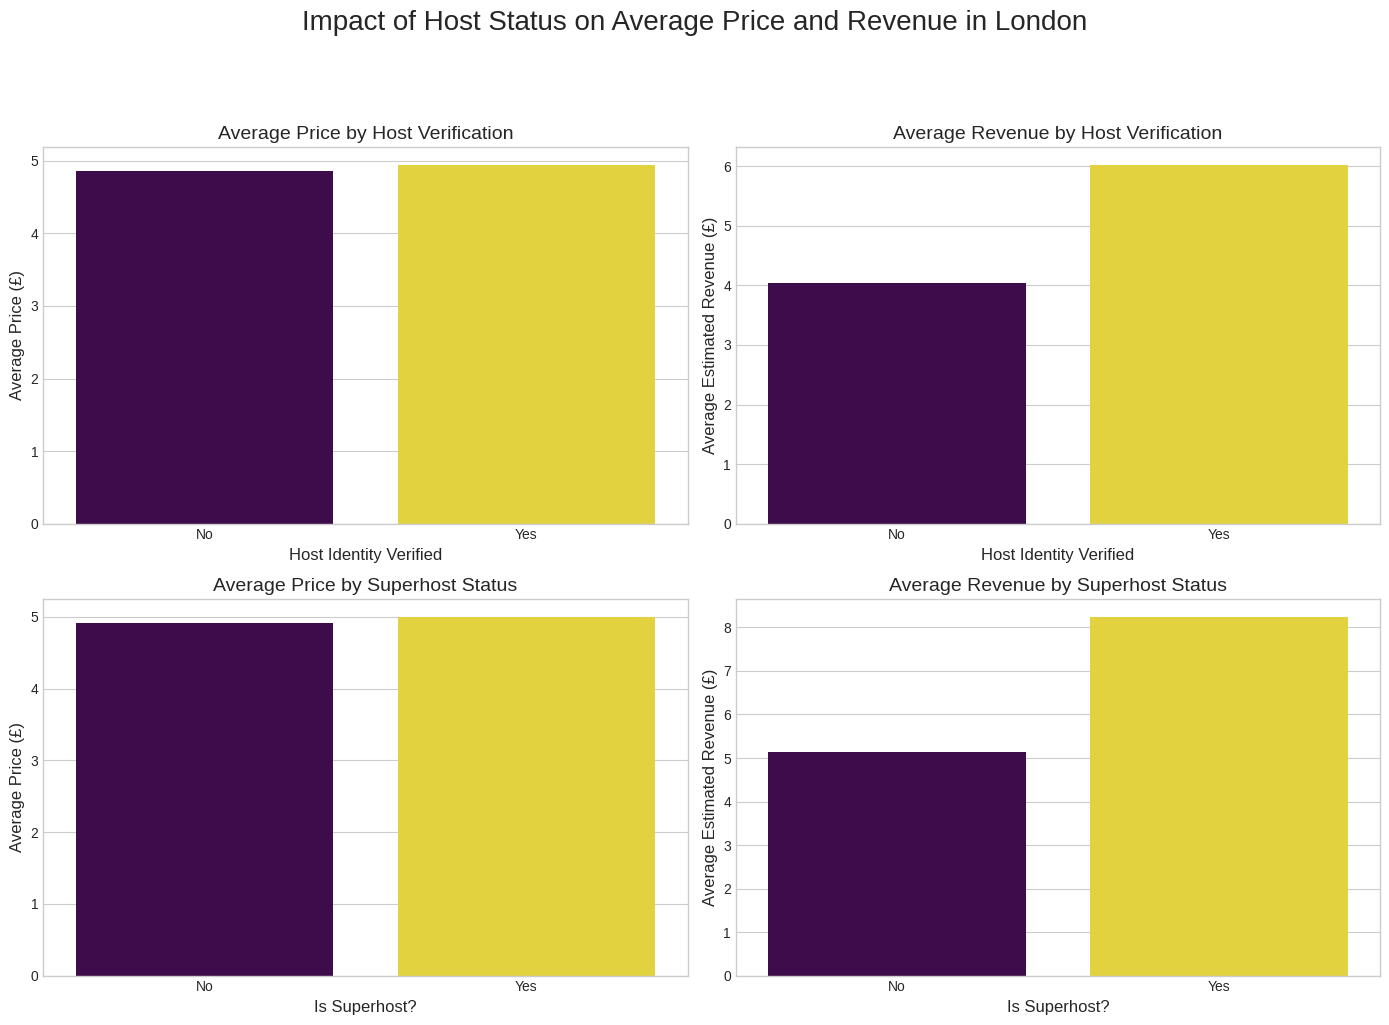

In [67]:

# Set a style for the plots
plt.style.use('seaborn-v0_8-whitegrid')

# --- Data Preparation for Plots ---

# Map boolean/string values to more readable labels for plotting
airbnb_data_cleaned['verification_status'] = airbnb_data_cleaned['host_identity_verified'].map({1: 'Yes', 0: 'No'})
airbnb_data_cleaned['superhost_status'] = airbnb_data_cleaned['host_is_superhost'].map({1: 'Yes', 0: 'No'})

# Group by host_identity_verified status
avg_metrics_by_verification = airbnb_data_cleaned.groupby('verification_status').agg(
    avg_price=('price', lambda x: np.log1p(x).mean()),
    avg_revenue=('estimated_revenue_l365d', lambda x: np.log1p(x).mean())
).reset_index()

# Group by host_is_superhost status
avg_metrics_by_superhost = airbnb_data_cleaned.groupby('superhost_status').agg(
    avg_price=('price', lambda x: np.log1p(x).mean()),
    avg_revenue=('estimated_revenue_l365d', lambda x: np.log1p(x).mean())
).reset_index()


# --- Create Subplots ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Impact of Host Status on Average Price and Revenue in London", fontsize=20, y=1.02)

# --- Row 1, Column 1: Price by Verification Status ---
sns.barplot(ax=axes[0, 0], x='verification_status', y='avg_price', data=avg_metrics_by_verification, palette='viridis', order=['No', 'Yes'],
            hue='avg_price', legend=False)
axes[0, 0].set_title('Average Price by Host Verification', fontsize=14)
axes[0, 0].set_xlabel('Host Identity Verified', fontsize=12)
axes[0, 0].set_ylabel('Average Price (£)', fontsize=12)


# --- Row 1, Column 2: Revenue by Verification Status ---
sns.barplot(ax=axes[0, 1], x='verification_status', y='avg_revenue', data=avg_metrics_by_verification, palette='viridis', order=['No', 'Yes'],
            hue='avg_revenue', legend=False)
axes[0, 1].set_title('Average Revenue by Host Verification', fontsize=14)
axes[0, 1].set_xlabel('Host Identity Verified', fontsize=12)
axes[0, 1].set_ylabel('Average Estimated Revenue (£)', fontsize=12)


# --- Row 2, Column 1: Price by Superhost Status ---
sns.barplot(ax=axes[1, 0], x='superhost_status', y='avg_price', data=avg_metrics_by_superhost, palette='viridis', order=['No', 'Yes'],
            hue='avg_price', legend=False)
axes[1, 0].set_title('Average Price by Superhost Status', fontsize=14)
axes[1, 0].set_xlabel('Is Superhost?', fontsize=12)
axes[1, 0].set_ylabel('Average Price (£)', fontsize=12)


# --- Row 2, Column 2: Revenue by Superhost Status ---
sns.barplot(ax=axes[1, 1], x='superhost_status', y='avg_revenue', data=avg_metrics_by_superhost, palette='viridis', order=['No', 'Yes'],
            hue='avg_revenue', legend=False)
axes[1, 1].set_title('Average Revenue by Superhost Status', fontsize=14)
axes[1, 1].set_xlabel('Is Superhost?', fontsize=12)
axes[1, 1].set_ylabel('Average Estimated Revenue (£)', fontsize=12)


# --- Adjust layout and show the plot ---
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust rect to make room for suptitle
plt.show()

**Interpretation of the Impact of Host Status on Average Price and Revenue:**

Based on the bar charts:

Host status, specifically being a verified host or a Superhost, significantly impacts revenue generation. While the average prices for listings by verified hosts and Superhosts are similar to those without these statuses, their estimated revenue is considerably higher. This suggests that guests are more likely to book with hosts they perceive as trustworthy and experienced, even if the nightly price is comparable. This finding motivates further study into how other factors like amenities, neighborhoods, and property types contribute to higher earnings for listings with verified or Superhost status.

# Price vs Host Characteristics
**How does host characteristics affect price?**

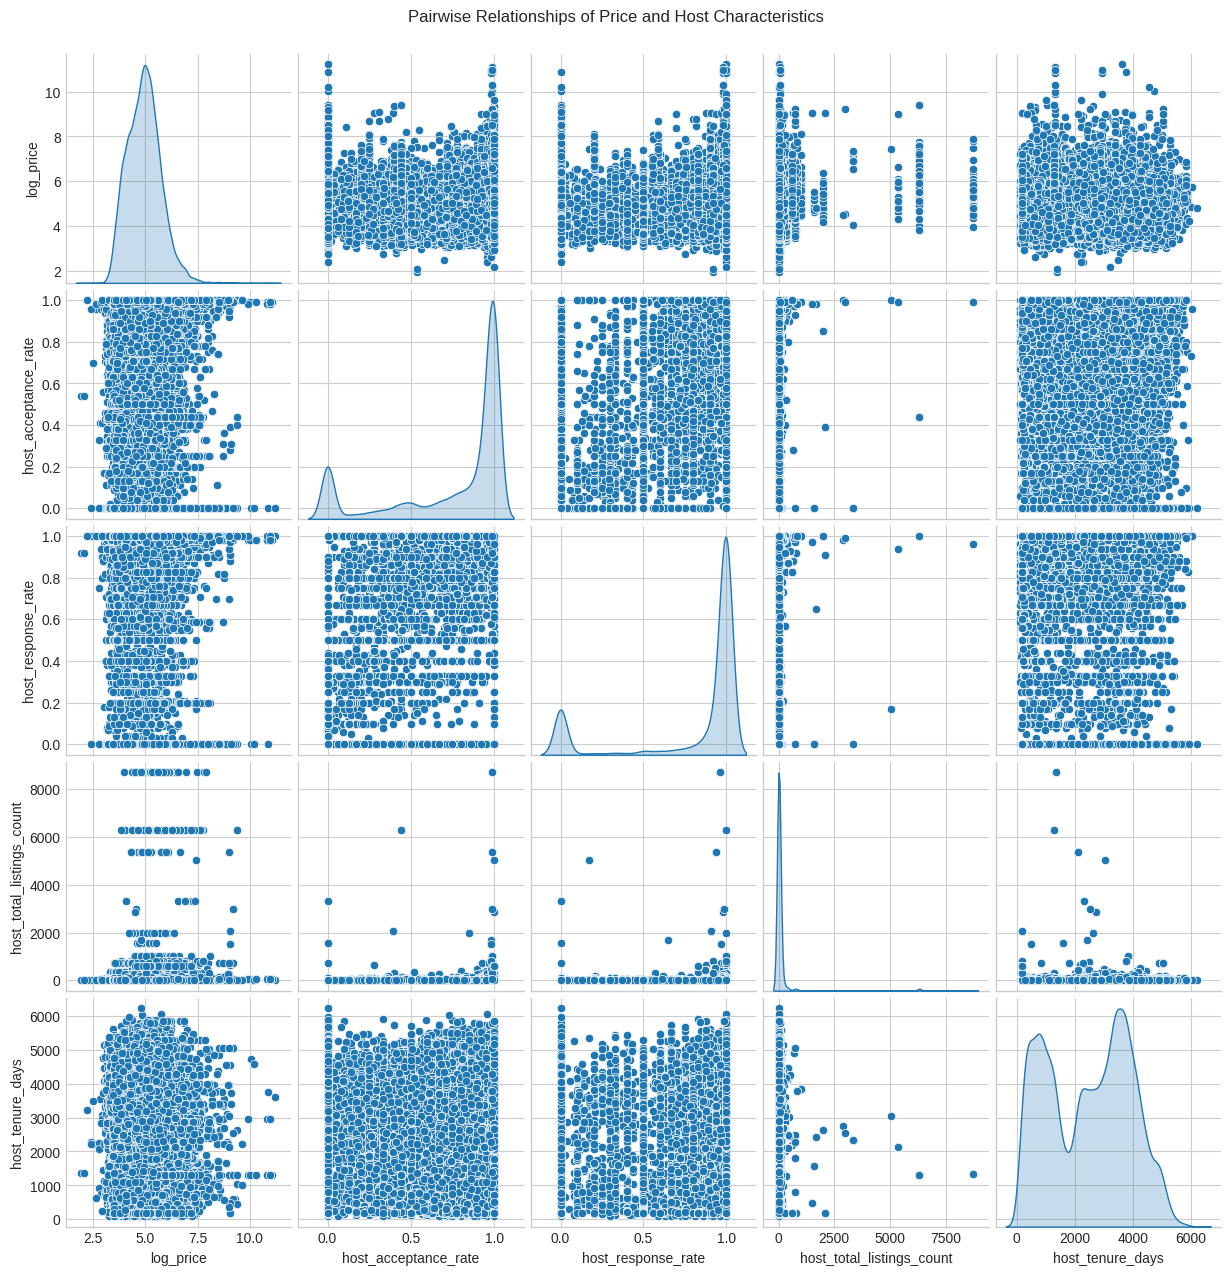

<Figure size 1000x800 with 0 Axes>

In [61]:
# Visualise relationship between price and key host characteristics
host_columns = ['host_acceptance_rate', 'host_response_rate', 'host_total_listings_count', 'host_tenure_days']

sns.pairplot(airbnb_data_cleaned[['log_price'] + host_columns], diag_kind='kde')
plt.suptitle('Pairwise Relationships of Price and Host Characteristics', y=1.02)
plt.figure(figsize=(10,8))
plt.show()

**Interpretation of Price vs. Host Characteristics Pairwise Relationships:**

Based on the pairwise plot:

* **Price vs. Host Acceptance Rate:** The scatter plot shows that many listings with high host acceptance rates are in the lower price ranges, and there's a wide spread across different acceptance rates for various prices. A clear linear relationship between price and host acceptance rate is not immediately apparent across the entire dataset.
* **Price vs. Host Response Rate:** Similar to host acceptance rate, a strong linear relationship between price and host response rate is not immediately apparent. Many listings with high response rates are in the lower price ranges, and there's a spread across different response rates for various prices.
* **Price vs. Host Total Listings Count:** The scatter plot shows that most listings, especially those at lower prices, are from hosts with a relatively low number of total listings. There are some hosts with a very high number of listings, and these listings cover a wide range of prices, including some of the higher-priced ones. This suggests that hosts with more listings might have a broader pricing strategy or offer a variety of property types at different price points.
* **Price vs. Host Tenure Days:** The scatter plot shows a wide spread of prices across different host tenure durations. While there might be some listings with higher prices associated with longer host tenure, there is no strong linear trend, and many listings at various tenure lengths are in the lower price ranges.

Overall, these plots suggest that while there might be some subtle trends, host acceptance rate, response rate, and host tenure days do not have a dominant, clear linear relationship with price across the entire dataset. The number of total listings might show some association, with hosts managing more properties having listings across a wider price spectrum.

## Price vs Review Characteristics
**Does customer reviews have any impact on price of listings?**

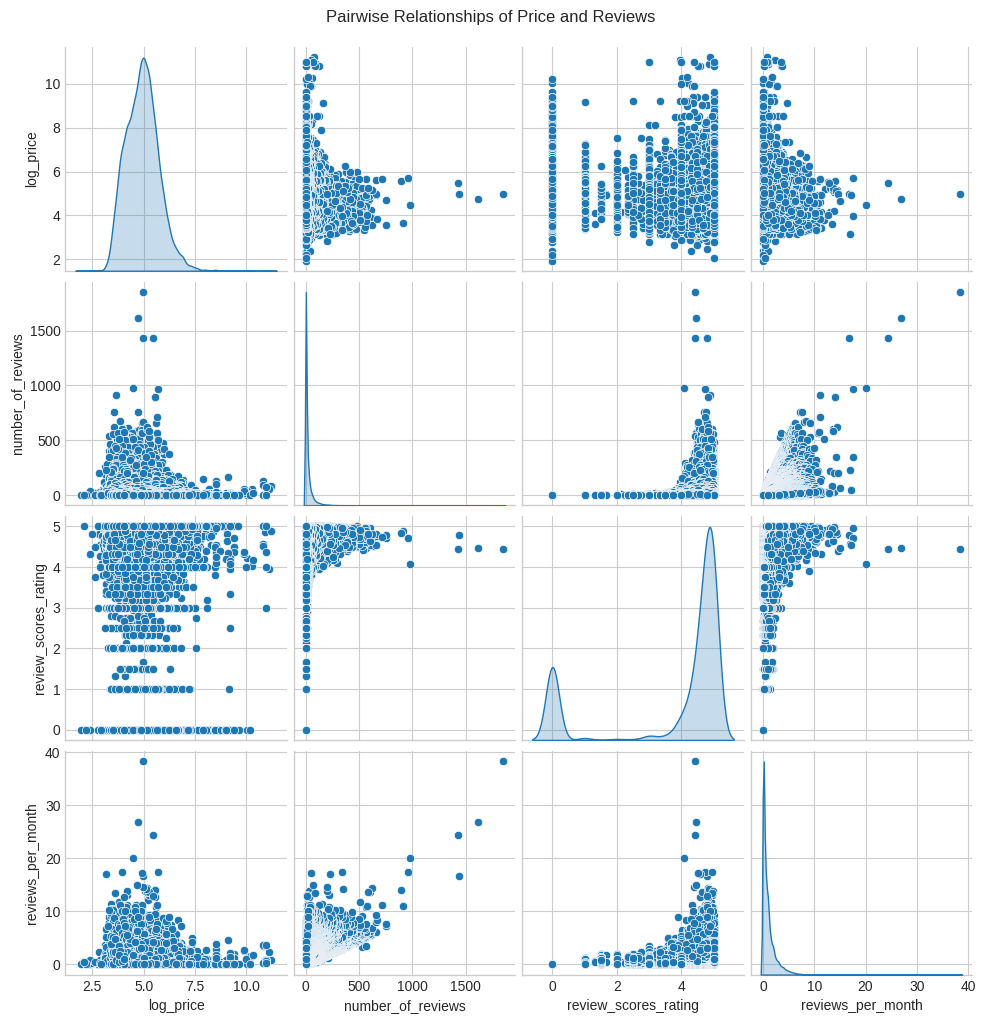

In [69]:
# Visualize relationships between price and key review characteristics
review_cols = ['number_of_reviews', 'review_scores_rating', 'reviews_per_month',
                           ]
sns.pairplot(airbnb_data_cleaned[['log_price'] + review_cols], diag_kind='kde')
plt.suptitle('Pairwise Relationships of Price and Reviews ', y=1.02)
plt.show()

**Detailed Interpretation: Price vs. Review Characteristics**

Expanding on the previous analysis, let's look closer at the relationship between `price` and the review-related variables:

* **Price vs. Number of Reviews:** No strong linear correlation. High number of reviews doesn't guarantee high price; other factors are more influential.
* **Price vs. Review Scores Rating:** No strong linear pattern. Many listings across various price points have high scores. High rating alone doesn't seem to be the primary driver of a high price.
* **Price vs. Reviews per Month:** No strong linear relationship. Higher rate of reviews per month doesn't directly dictate a high price.

In summary, while review characteristics are important indicators, they do not appear to have a dominant, direct linear relationship with price. Price is likely influenced by a combination of factors including location, property type, size, amenities, and market demand, in addition to review performance.


## Price vs Facilities
**What is the relationship between an accomodation's facilities and it's price?**

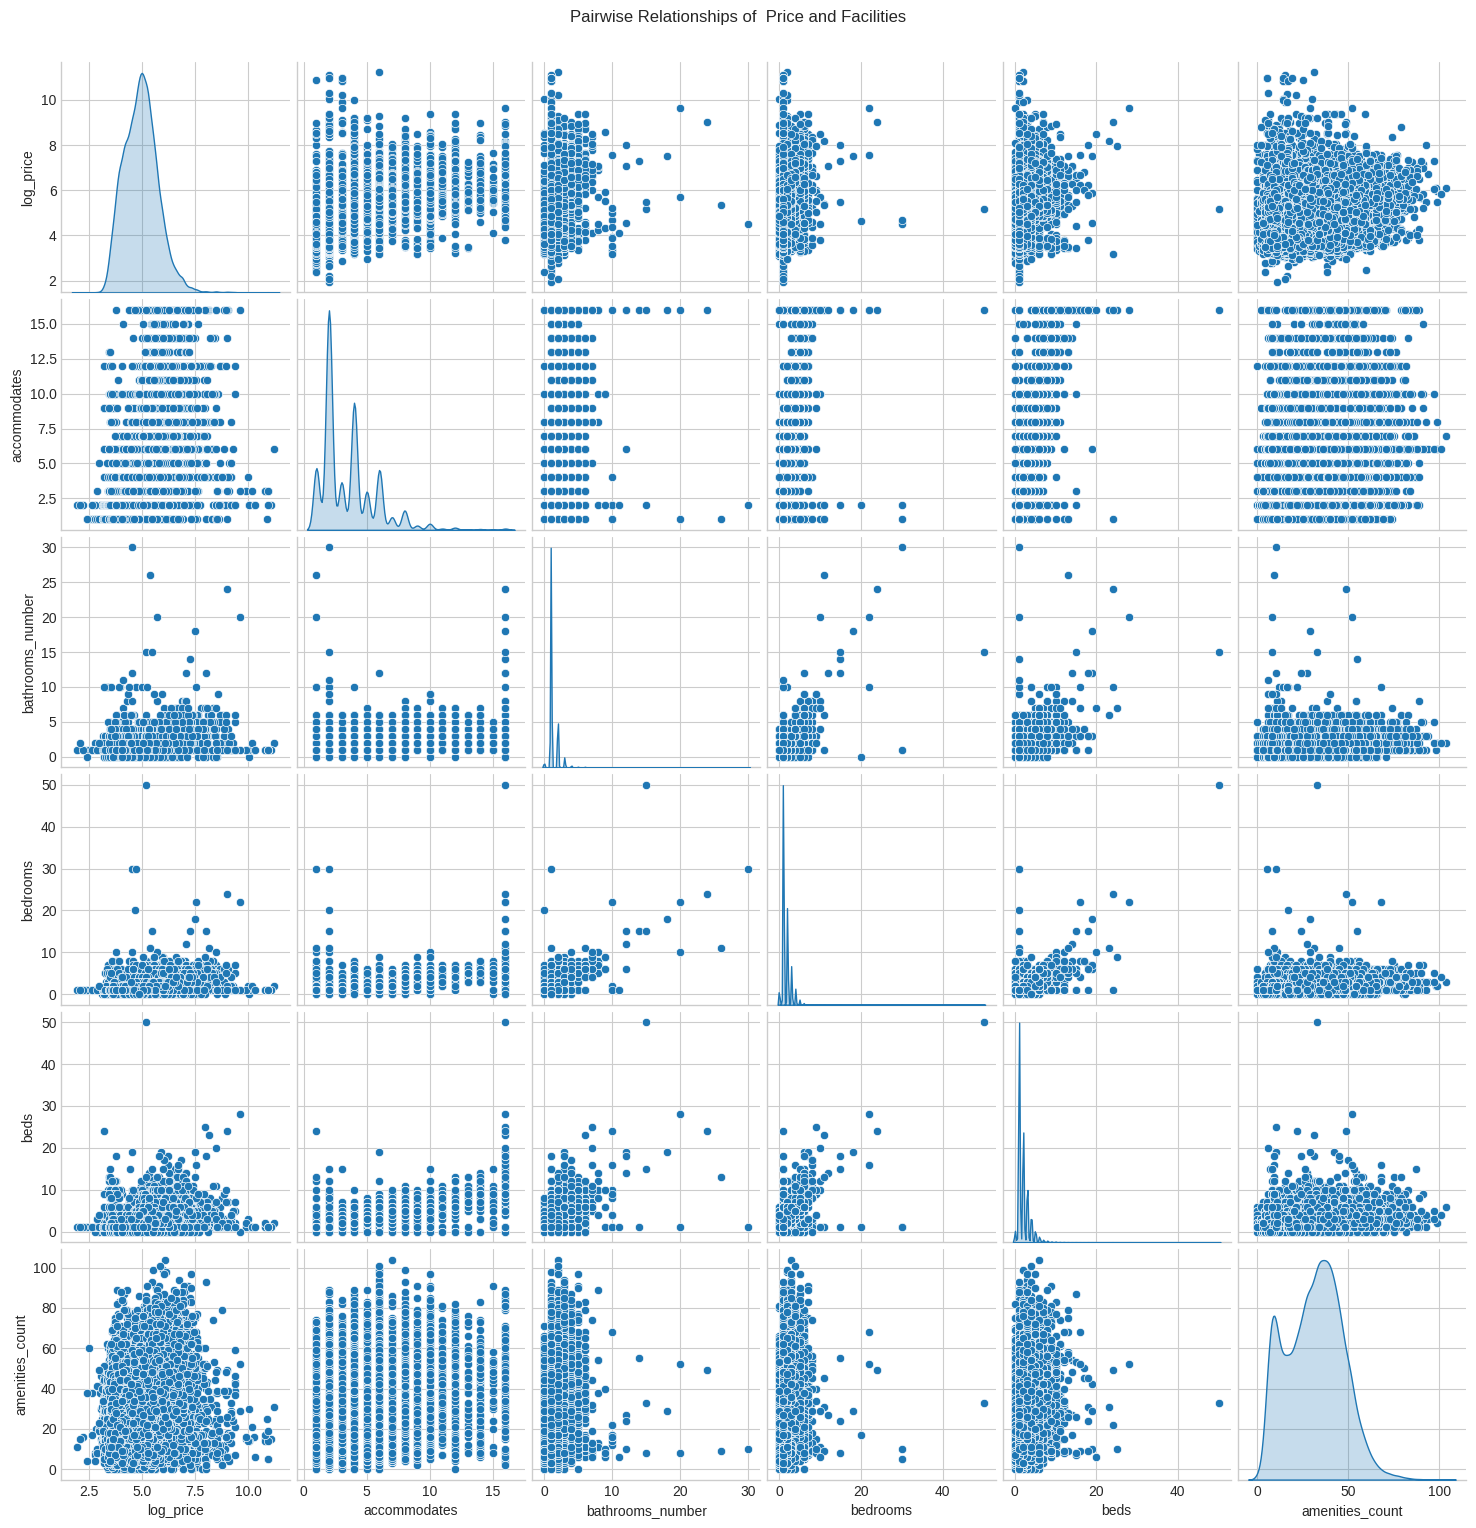

In [70]:
# Visualise relationship between price and key facilities
facilities_cols = ['accommodates', 'bathrooms_number', 'bedrooms', 'beds', 'amenities_count']

sns.pairplot(airbnb_data_cleaned[['log_price'] + facilities_cols], diag_kind='kde')
plt.suptitle('Pairwise Relationships of Price and Facilities', y=1.02)
plt.show()

**Interpretation of Price vs. Facilities Pairwise Relationships:**

Based on the pairwise plot:

* **Price vs. Accommodates:** There appears to be a general trend where listings that accommodate more people tend to have higher prices, although the relationship is not perfectly linear and there is significant spread in prices for any given number of accommodates.
* **Price vs. Bathrooms Number, Bedrooms, and Beds:** Similar to 'accommodates', there's a tendency for prices to increase as the number of bathrooms, bedrooms, and beds increases. However, there's a wide variation in price for properties with the same number of these facilities. Outliers with very high prices exist across different numbers of bathrooms, bedrooms, and beds.
* **Price vs. Amenities Count:** The plot shows a wide spread of prices for listings with varying numbers of amenities. While there might be a slight upward trend in price as the number of amenities increases, it's not a strong or consistent relationship across all price ranges. Many listings with a moderate number of amenities are in the lower price ranges.

Overall, the plots suggest that while the number of accommodates, bathrooms, bedrooms, and beds show some positive association with price, the relationship is not strictly linear, and other factors also heavily influence the price. The number of amenities seems to have a weaker relationship with price compared to the size-related features.

##

## Revenue vs Facilities
**What is the relationship between an accommodation's facilities and revenue?**


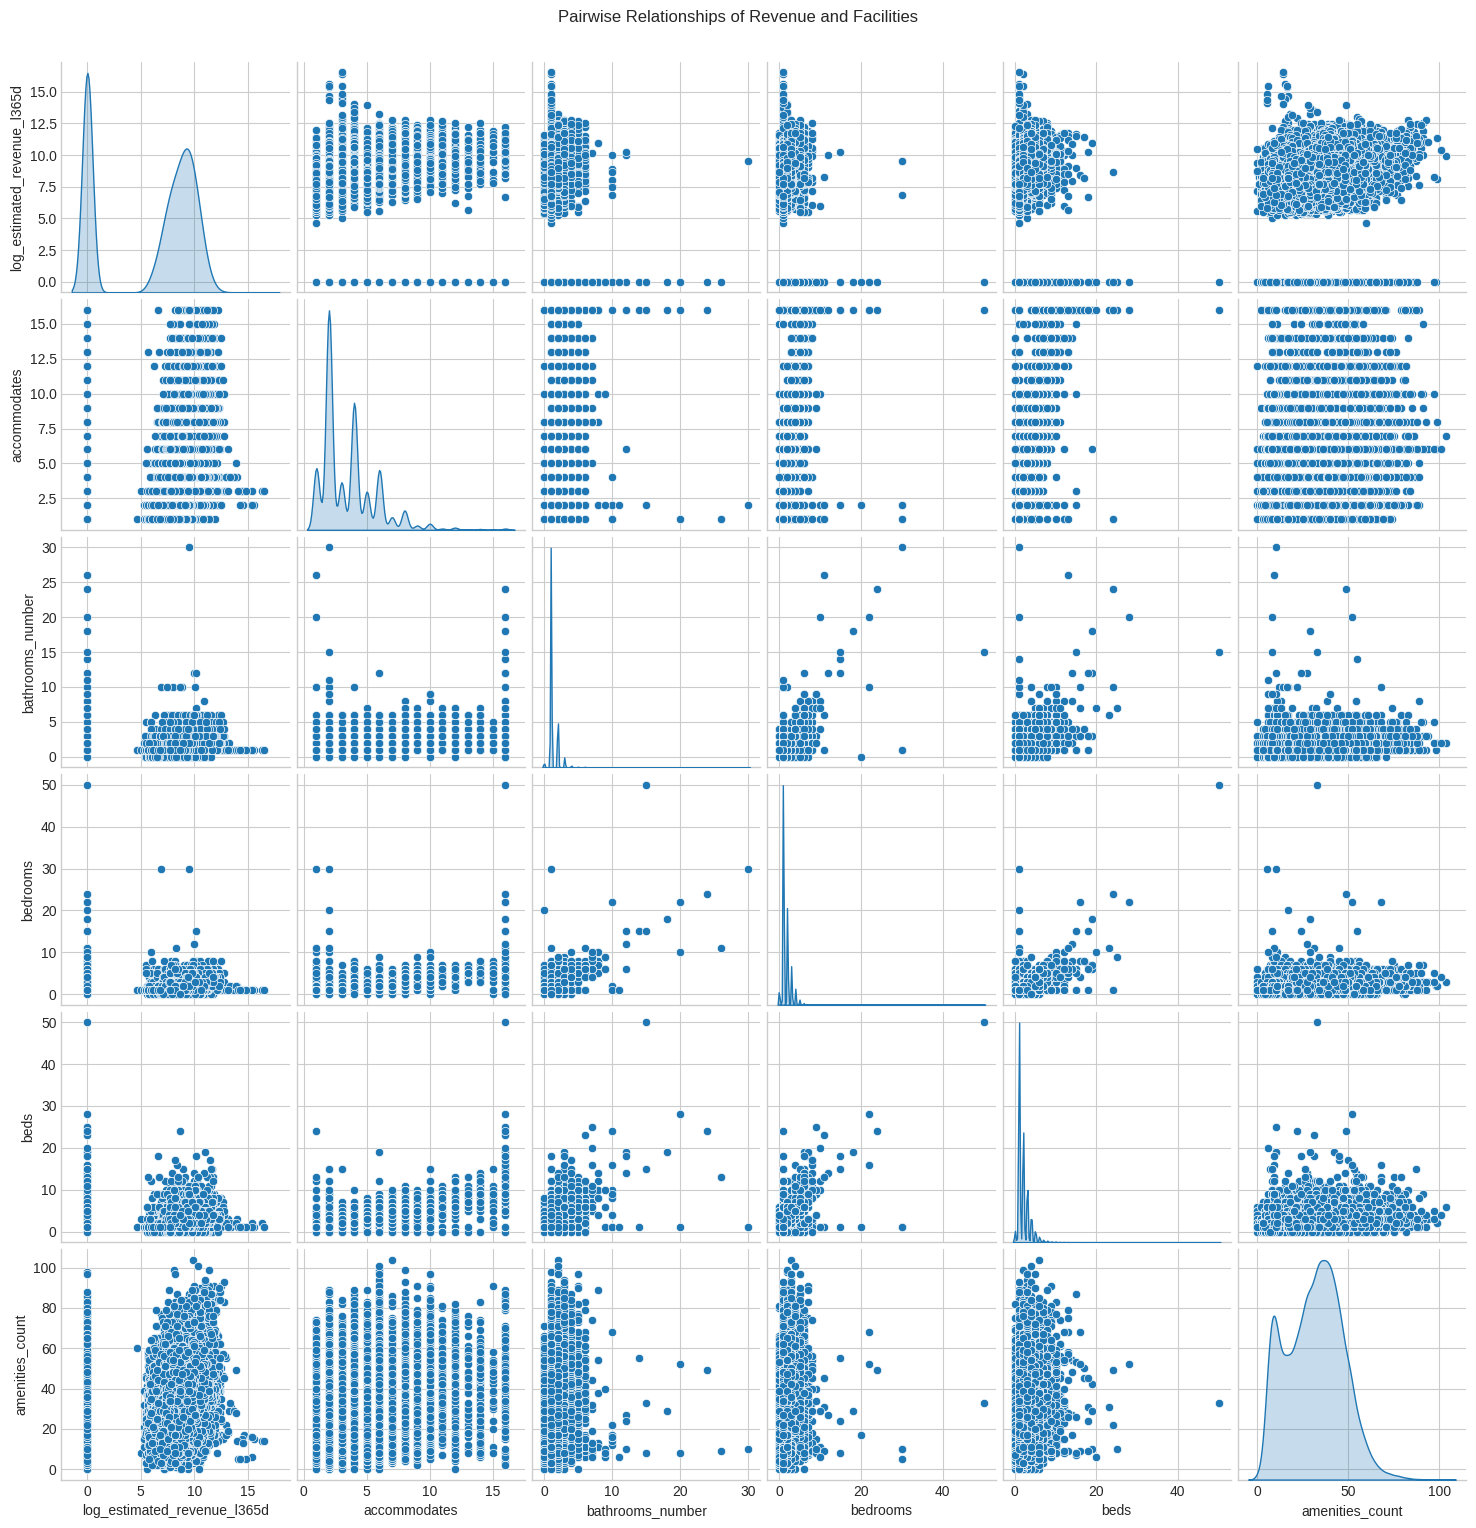

In [71]:
# Visualise relationship between revenue and key facilities
sns.pairplot(airbnb_data_cleaned[['log_estimated_revenue_l365d'] + facilities_cols], diag_kind='kde')
plt.suptitle('Pairwise Relationships of Revenue and Facilities', y=1.02)
plt.show()

**Interpretation of Revenue vs. Facilities Pairwise Relationships:**

Based on the pairwise plot showing the relationship between estimated revenue and accommodation facilities:

* **Estimated Revenue vs. Accommodates:** The scatter plot suggests a positive relationship between estimated revenue and the number of people a listing accommodates. Generally, listings that can host more guests tend to generate higher estimated revenue. While there's variability, the upper bound of estimated revenue appears to increase as the number of accommodates rises. This indicates that larger properties or those designed for more guests have a higher earning potential.
* **Estimated Revenue vs. Bathrooms Number, Bedrooms, and Beds:** Similar positive trends are observed between estimated revenue and the number of bathrooms, bedrooms, and beds. Listings with more bathrooms, bedrooms, and beds tend to have higher estimated revenue. This reinforces the idea that the size and capacity of a property are significant factors influencing its revenue generation. Properties with more facilities to accommodate guests are likely to attract more bookings or command higher prices, leading to increased revenue.
* **Estimated Revenue vs. Amenities Count:** The scatter plot for estimated revenue and amenities count shows a general upward trend, but with considerable spread. Listings with a higher number of amenities tend to have higher estimated revenue, particularly at the higher end of the revenue spectrum. This suggests that while having more amenities can contribute to higher earnings, it's not a guaranteed factor for all listings, and the specific types and quality of amenities likely also play a role.

In summary, the pairwise plots indicate that accommodation facilities, particularly those related to the size and capacity of the property (`accommodates`, `bathrooms_number`, `bedrooms`, `beds`), show a clear positive relationship with estimated revenue. The number of amenities also appears to contribute positively to revenue, although the relationship might be more complex. These findings highlight that the physical characteristics and offerings of a listing are strong predictors of its potential earnings.

## **Does listings with more reviews tend to earn more revenue?**

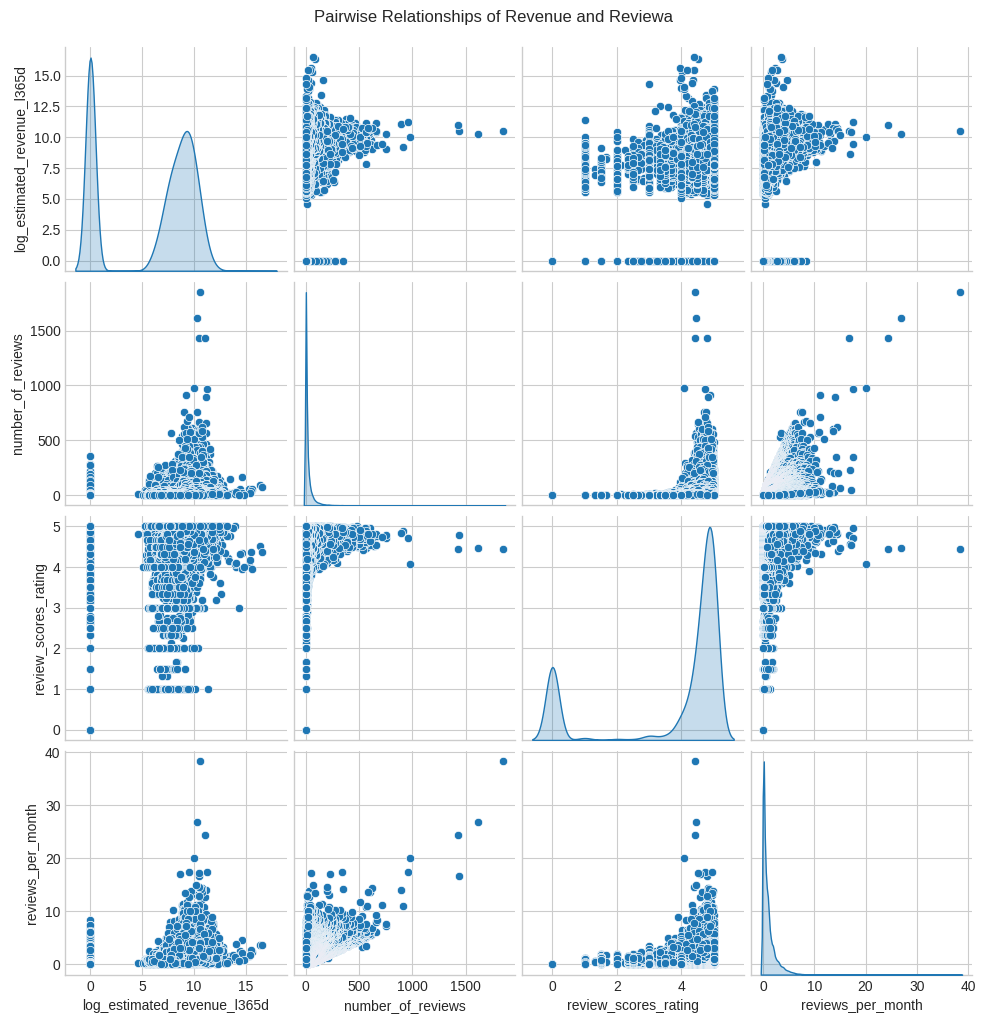

In [72]:
# Visualise relationship between revenue andr reviews
sns.pairplot(airbnb_data_cleaned[['log_estimated_revenue_l365d'] + review_cols], diag_kind='kde')
plt.suptitle('Pairwise Relationships of Revenue and Reviews', y=1.02)
plt.show()

**Interpretation of Estimated Revenue vs. Review Characteristics:**

Based on the pairwise plot showing the relationship between estimated revenue and review characteristics:

* **Estimated Revenue vs. Number of Reviews:** The scatter plot shows a positive relationship between estimated revenue and the number of reviews. Listings with a higher number of reviews tend to have higher estimated revenue. This suggests that popular listings with more guest feedback are likely to generate more income.
* **Estimated Revenue vs. Review Scores Rating:** There appears to be a positive association between estimated revenue and review scores rating, particularly at higher revenue levels. Listings with higher estimated revenue tend to have higher review scores ratings. This indicates that guest satisfaction, as reflected in review scores, is likely linked to higher earning potential.
* **Estimated Revenue vs. Reviews per Month:** The scatter plot shows a positive relationship between estimated revenue and reviews per month. Listings with a higher rate of reviews per month tend to have higher estimated revenue. This suggests that listings with more frequent bookings and guest activity are likely to generate more income.

In summary, the pairwise plots indicate that there are positive relationships between estimated revenue and review characteristics (`number_of_reviews`, `review_scores_rating`, and `reviews_per_month`). Listings that are more popular, have higher guest satisfaction, and more frequent reviews tend to generate higher estimated revenue. This highlights the importance of positive guest experiences and consistent bookings for maximizing revenue.

## **Can host characteristics impact revenue?**

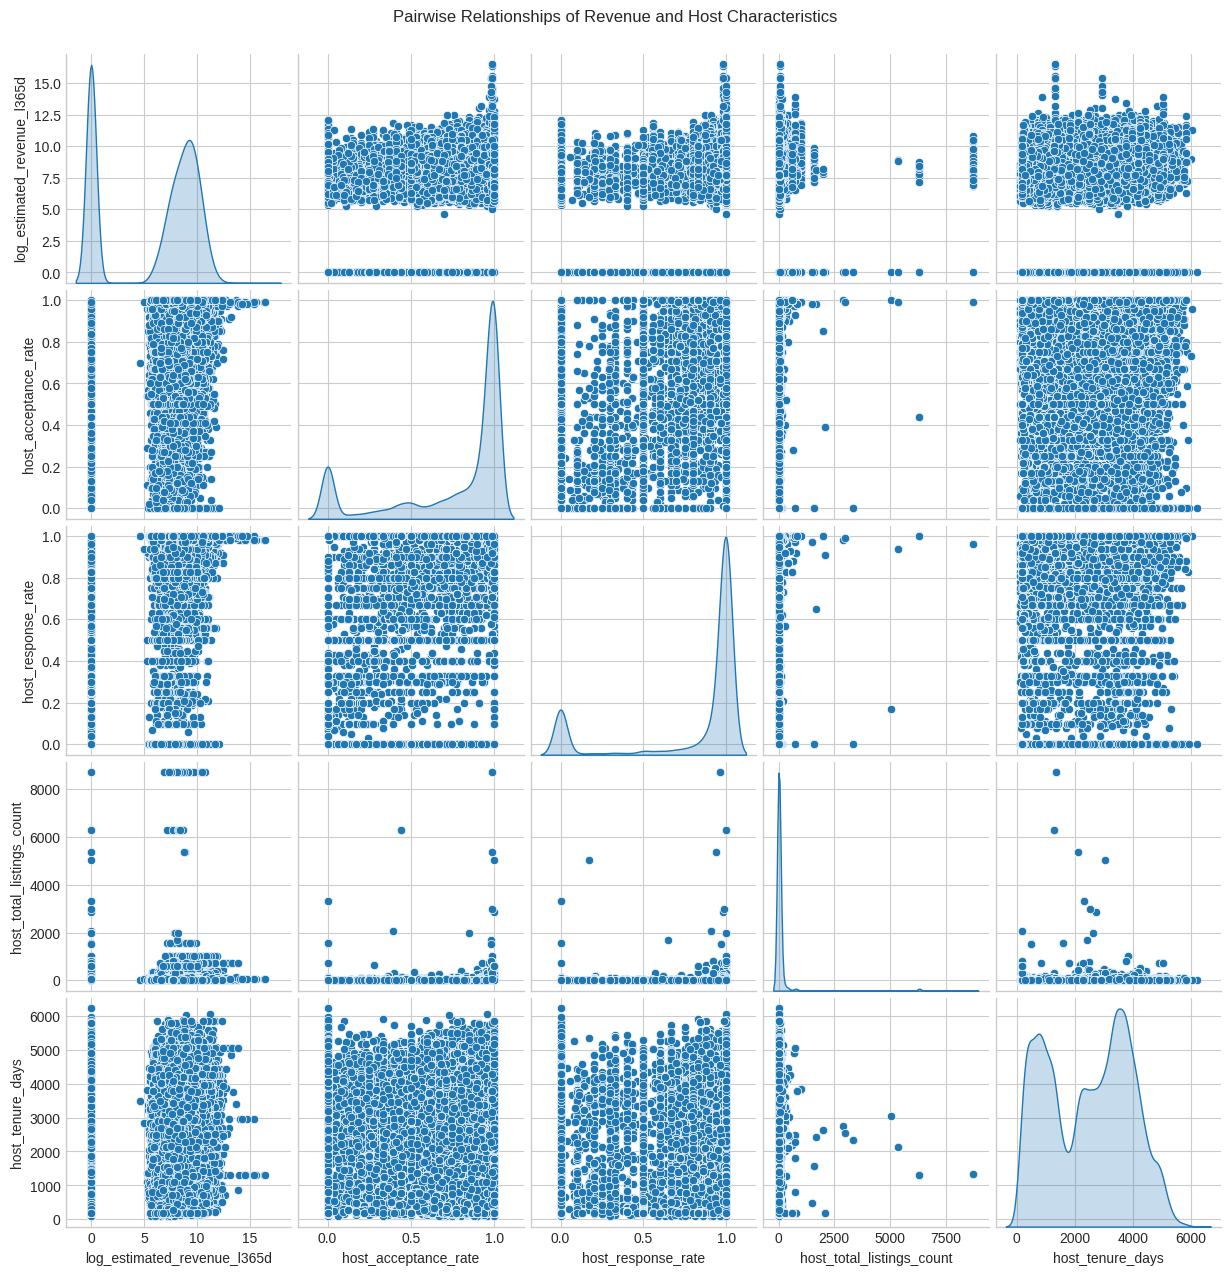

In [73]:
# Visualise relationship between revenue and host characteristics
sns.pairplot(airbnb_data_cleaned[['log_estimated_revenue_l365d'] + host_columns], diag_kind='kde')
plt.suptitle('Pairwise Relationships of Revenue and Host Characteristics', y=1.02)
plt.show()

**Interpretation of Estimated Revenue vs. Host Characteristics:**

Based on the pairwise plot showing the relationship between estimated revenue and host characteristics:

* **Estimated Revenue vs. Host Acceptance Rate and Host Response Rate:** The scatter plots show a wide distribution of estimated revenue across different host acceptance and response rates. While there are listings with high estimated revenue at high acceptance and response rates, there isn't a clear linear trend. This suggests that while being responsive and accepting might be beneficial, they are not the sole determinants of high revenue, and other factors play a significant role.
* **Estimated Revenue vs. Host Total Listings Count:** The scatter plot indicates a positive relationship between estimated revenue and the total number of listings a host has. Hosts with a higher number of listings tend to have listings that generate higher estimated revenue, particularly at the higher end of the revenue spectrum. This could suggest that experienced hosts with multiple properties are more successful in generating revenue, possibly due to economies of scale, better management, or a portfolio of high-performing properties.
* **Estimated Revenue vs. Host Tenure Days:** The scatter plot shows a wide spread of estimated revenue across different host tenure durations. While there are listings with higher estimated revenue associated with longer host tenure, there is no strong linear trend across all listings. This suggests that while experience on the platform might be beneficial, it doesn't guarantee high revenue, and newer hosts can also have successful listings.

In summary, the pairwise plots suggest that among host characteristics, the total number of listings a host manages appears to have the clearest positive relationship with estimated revenue. Host acceptance rate, response rate, and tenure days show less distinct linear relationships with revenue across the entire dataset, indicating that their impact on revenue might be more complex or indirect.

# Key Insights for Hosts and Next Steps

This analysis explored the Airbnb dataset to uncover factors influencing listing performance, particularly price and estimated revenue. Here are some key takeaways and actionable insights for both upcoming and existing hosts:

**Insights for Upcoming and Existing Hosts:**

* **Property and Room Type Strategy:** "Entire rental units" and "Entire home/apt" are the most popular listing types. Consider offering these if possible, as they have strong market presence. "Entire townhouses" and "Entire serviced apartments" command the highest average prices and revenue – explore these if you have access to such properties. The "Shared room" also shows surprising revenue potential despite lower prices.
* **Targeting Guest Capacity:** The market has a high demand for listings accommodating 1-4 guests. Ensure your property is optimized for a specific guest capacity, and consider if catering to slightly larger groups aligns with your property and goals, as capacity correlates with higher revenue.
* **The Superhost Advantage:** While Superhosts might not always charge the highest prices, they earn significantly more revenue on average. Focus on achieving Superhost status by providing excellent guest experiences, which leads to more bookings and higher earnings.
* **Location, Location, Location:** The City of London, Kensington and Chelsea, and Westminster have the highest average prices. However, Islington emerges as a top neighborhood for revenue, suggesting a good balance of price and demand. For maximizing earnings, look for "sweet spot" neighborhoods like Islington.
* **Verification Builds Trust and Revenue:** Having a verified identity (`host_identity_verified`) is associated with significantly higher revenue. Ensure your host identity is verified to build trust with potential guests.
* **Facilities Boost Earnings:** The number of accommodates, bathrooms, bedrooms, and beds are positively related to estimated revenue. Investing in or highlighting these facilities can increase earning potential. The number of amenities also contributes, so ensure your listing is well-equipped.
* **Reviews Drive Revenue:** More reviews, higher ratings, and a higher rate of reviews per month are all linked to higher estimated revenue. Prioritize providing excellent guest experiences to get positive reviews and encourage guests to leave feedback.
* **Experienced Hosts with More Listings Earn More:** Hosts with a higher total number of listings tend to generate more revenue. This suggests that experience and managing multiple properties can be beneficial.

**Next Steps for Deeper Understanding and Action:**

To further leverage these insights the next phase will involve:

1. **Detailed Revenue and Price Drivers:** Dive deeper into which specific factors most strongly predict estimated revenue and price.
2. **Investigate superhost_status**: Does listings offered by hosts with superhost status have a statistically significant differences in prices and revenue when compared with hosts with no superhost status?
3. **Categoricals Deep Dive:** Identify which specific facilities, amenities are most popular or correlated with higher earnings.
4. **Competitive Analysis:** Compare your listing's features, pricing, and reviews to successful listings in your area.
5. **Potential for Optimization:** Use these insights to identify areas where you can improve your listing (e.g., adding amenities, optimizing pricing, enhancing guest communication).

You can move on to the next notebook for these steps: [04_advanced_eda_and_modelling](data.ipynb)